# Final Capstone Project #

## Importing Libraries ##

In [2]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder


Solving environment: done

# All requested packages already installed.



## Read Restaurants Data Set ##

In [3]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:

df_brazil = df[df['Country Code'] == 30]
df_sp = df_brazil[df_brazil['City'] == 'Sí£o Paulo']
df_rio = df_brazil[df_brazil['City'] == 'Rio de Janeiro']
df_brasilia = df_brazil[df_brazil['City'] == 'Brasí_lia']


#df_NDLS.reset_index(drop=True, inplace=True)
df_sp



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
62,6706313,Cantina Famiglia Mancini,30,Sí£o Paulo,"Rua Avanhandava, 81, Bela Vista, Sí£o Paulo 10000","Bela Vista, Centro","Bela Vista, Centro, Sí£o Paulo",-46.645167,-23.550667,"Italian, Pizza",...,Brazilian Real(R$),No,No,No,No,4,4.5,Dark Green,Excellent,49
63,6704326,Templo da Carne - Marcos Bassi,30,Sí£o Paulo,"Rua Treze de Maio, 668, Bela Vista, Sí£o Paulo...","Bela Vista, Centro","Bela Vista, Centro, Sí£o Paulo",-46.646333,-23.559000,"Steak, BBQ",...,Brazilian Real(R$),No,No,No,No,4,4.4,Green,Very Good,17
64,6711179,Gopala Hari,30,Sí£o Paulo,"Rua Antonio Carlos, 429, Consolaí_í£o, Sí£o Paulo",Consolaí_í£o,"Consolaí_í£o, Sí£o Paulo",-46.658667,-23.556167,Indian,...,Brazilian Real(R$),No,No,No,No,3,3.1,Orange,Average,5
65,6702797,Jiquitaia,30,Sí£o Paulo,"Rua AntíÇnio Carlos, 268, Consolaí_í£o, Sí£o P...",Consolaí_í£o,"Consolaí_í£o, Sí£o Paulo",-46.657523,-23.556710,Brazilian,...,Brazilian Real(R$),No,No,No,No,4,4.1,Green,Very Good,15
66,6700475,Skye - Hotel Unique,30,Sí£o Paulo,"Hotel Unique, Avenida Brigadeiro Luí_s AntíÇni...","Hotel Unique, Jardim Paulista","Hotel Unique, Jardim Paulista, Sí£o Paulo",-46.666851,-23.581688,"Beverages, International",...,Brazilian Real(R$),No,No,No,No,4,4.8,Dark Green,Excellent,59
67,6713413,Les 3 Brasseurs,30,Sí£o Paulo,"Rua Jesuí_no Arruda, 470, Itaim Bibi, Sí£o Paulo",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675110,-23.582135,"French, Brazilian, Beverages",...,Brazilian Real(R$),No,No,No,No,4,4.6,Dark Green,Excellent,30
68,6714340,Red Steak & Burger,30,Sí£o Paulo,"Rua Tabapuí£, 1417, Itaim Bibi, Sí£o Paulo",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.683888,-23.585324,"Brazilian, Grill",...,Brazilian Real(R$),No,No,No,No,3,3.9,Yellow,Good,5
69,6710645,Cantinho da Gula,30,Sí£o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, Sí£o P...",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675667,-23.581000,Brazilian,...,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0
70,6700402,Paris 6 Classique,30,Sí£o Paulo,"Rua Haddock Lobo, 1240, Cerqueira Cí©sar, Jard...",Jardim Paulista,"Jardim Paulista, Sí£o Paulo",-46.666041,-23.561568,French,...,Brazilian Real(R$),No,No,No,No,4,3.4,Orange,Average,73
71,6700846,Kawa Sushi,30,Sí£o Paulo,"Alameda Lorena, 300, Jardim Paulista, Sí£o Paulo",Jardim Paulista,"Jardim Paulista, Sí£o Paulo",-46.657418,-23.571638,"Sushi, Japanese",...,Brazilian Real(R$),No,No,No,No,4,3.5,Yellow,Good,9


## Some Cleaning on de Data ##

In [5]:

df_Res= df_brazil[df_brazil.Longitude !=0.000000][['Restaurant Name','City','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]


In [6]:

df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [7]:

df_Res

,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
22,Chez Michou,Brasí_lia,Asa Norte,-47.881789,-15.764142,"Fast Food, French",3.0,Average,6
23,Cafí© Daniel Briand,Brasí_lia,Asa Norte,-47.882667,-15.777500,Cafe,3.8,Good,9
24,Casa do Biscoito Mineiro,Brasí_lia,Asa Norte,-47.882136,-15.757472,Bakery,3.7,Good,11
25,Maori,Brasí_lia,Asa Norte,-47.888167,-15.758833,Brazilian,3.8,Good,11
26,Pizza íæ Bessa,Brasí_lia,Asa Sul,-47.915667,-15.831167,Pizza,3.2,Average,11
27,Sushi Loko,Brasí_lia,Asa Sul,-47.915667,-15.831000,Japanese,3.1,Average,10
28,Beirute,Brasí_lia,Asa Sul,-47.907500,-15.820000,Arabian,3.7,Good,8
29,New Koto,Brasí_lia,Asa Sul,-47.910167,-15.827333,Japanese,3.7,Good,5
31,Villa Tevere,Brasí_lia,Asa Sul,-47.923667,-15.831333,Italian,4.1,Very Good,12
32,Rovereto,Brasí_lia,íguas Claras,-48.019000,-15.837167,Pizza,3.1,Average,9


## Creating a Map to show Restaurants Clusters##

In [8]:


Brazil_Rest = folium.Map(location=[-14.23, -51.92], zoom_start=5)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, City, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['City'], df_Res['Cluster']):
    label = folium.Popup(City, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Brazil_Rest)  

Brazil_Rest



In [9]:
df_Res

,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
22,Chez Michou,Brasí_lia,Asa Norte,-47.881789,-15.764142,"Fast Food, French",3.0,Average,6,1
23,Cafí© Daniel Briand,Brasí_lia,Asa Norte,-47.882667,-15.777500,Cafe,3.8,Good,9,1
24,Casa do Biscoito Mineiro,Brasí_lia,Asa Norte,-47.882136,-15.757472,Bakery,3.7,Good,11,1
25,Maori,Brasí_lia,Asa Norte,-47.888167,-15.758833,Brazilian,3.8,Good,11,1
26,Pizza íæ Bessa,Brasí_lia,Asa Sul,-47.915667,-15.831167,Pizza,3.2,Average,11,1
27,Sushi Loko,Brasí_lia,Asa Sul,-47.915667,-15.831000,Japanese,3.1,Average,10,1
28,Beirute,Brasí_lia,Asa Sul,-47.907500,-15.820000,Arabian,3.7,Good,8,1
29,New Koto,Brasí_lia,Asa Sul,-47.910167,-15.827333,Japanese,3.7,Good,5,1
31,Villa Tevere,Brasí_lia,Asa Sul,-47.923667,-15.831333,Italian,4.1,Very Good,12,1
32,Rovereto,Brasí_lia,íguas Claras,-48.019000,-15.837167,Pizza,3.1,Average,9,3


## Best Restaurantes in Brazil ##

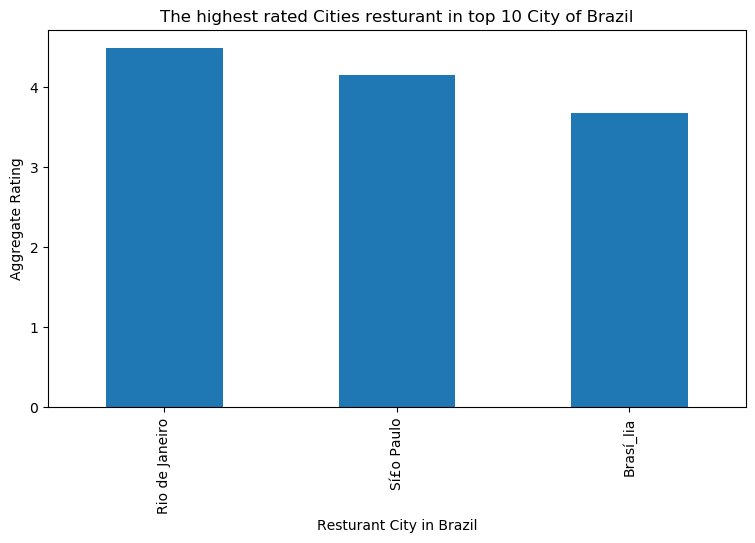

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated Cities resturant in top 10 City of Brazil')
#On x-axis

#giving a bar plot
df_Res.groupby('City')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant City in Brazil')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

## worst restaurants in Brazil? ##

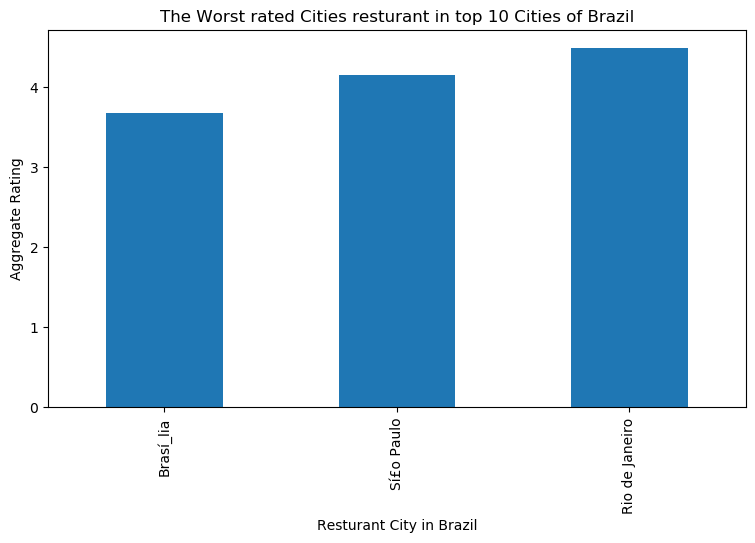

In [11]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated Cities resturant in top 10 Cities of Brazil')
#On x-axis

#giving a bar plot

df_Res.groupby('City')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant City in Brazil')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()



## Which place are suitable for edible person in Sao Paulo? ##

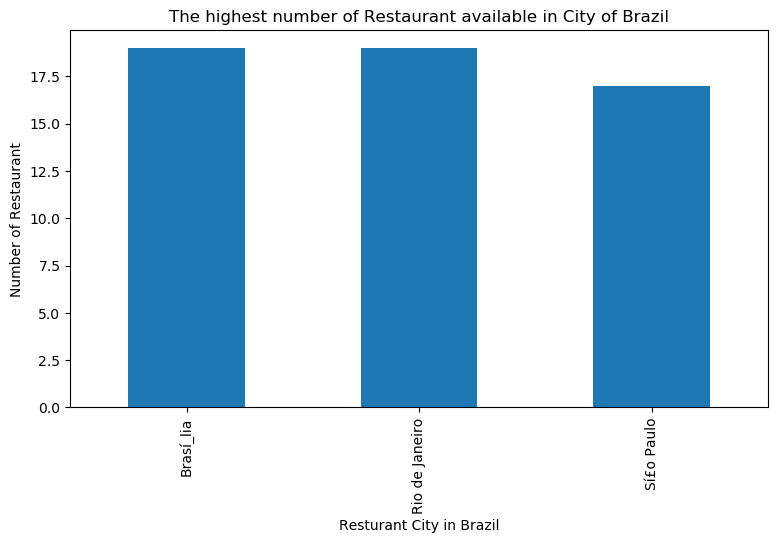

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in City of Brazil')
#On x-axis

#giving a bar plot
df_Res.groupby('City')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant City in Brazil')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for Japanese restaurant in Brazil ##

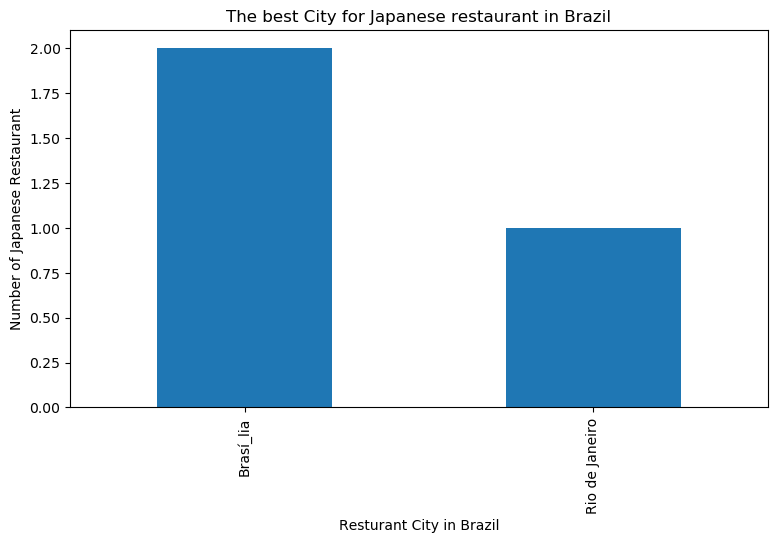

In [13]:
df_Res

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best City for Japanese restaurant in Brazil')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Japanese')].groupby('City')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant City in Brazil')
#On y-axis
plt.ylabel('Number of Japanese Restaurant')

#displays the plot
plt.show()





## What are the best places for Italian restaurant in Brazil ##

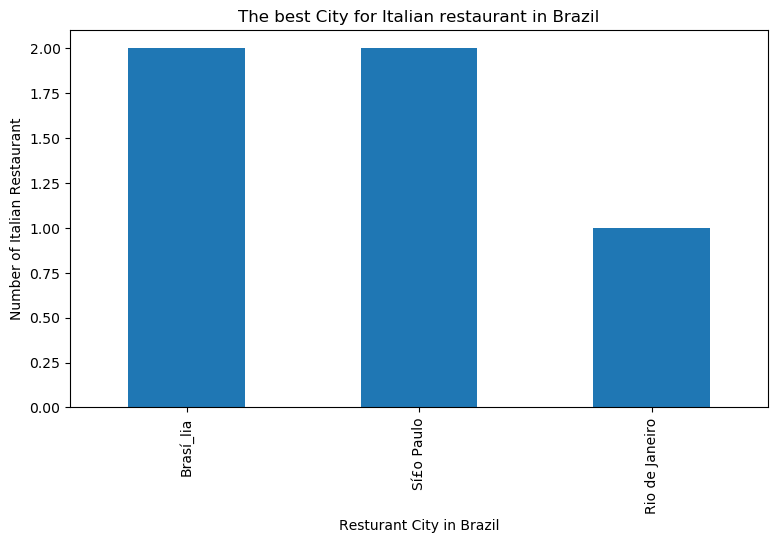

In [14]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best City for Italian restaurant in Brazil')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Italian')].groupby('City')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant City in Brazil')
#On y-axis
plt.ylabel('Number of Italian Restaurant')

#displays the plot
plt.show()


## Transforming Data ##

In [15]:
df_Res_Loc =  df_Res.groupby('City').count()['Restaurant Name'].to_frame()

df_Res_rating= df_Res.groupby('City')['Aggregate rating'].mean().to_frame()

d_Cuisines = df_Res.groupby(['City'])['Cuisines'].agg(', '.join).reset_index()

d_R = df_Res.groupby(['City'])['Rating text'].unique().agg(', '.join).reset_index()

d_V = df_Res.groupby(['City'])['Votes'].sum().to_frame()

d_Lat = df_Res.groupby('City').mean()['Latitude'].to_frame()

d_Lng = df_Res.groupby('City').mean()['Longitude'].to_frame()

df_final = pd.merge(d_Lat,d_Lng,on='City').merge(df_Res_Loc, on='City').merge(d_Cuisines, on='City').merge(df_Res_rating,on ='City').merge(d_R, on ='City').merge(d_V, on ='City')



In [16]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['city','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final

,city,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,Brasí_lia,-15.808132,-47.917263,19,"Fast Food, French, Cafe, Bakery, Brazilian, Pi...",3.678947,"Average, Good, Very Good, Excellent",215
1,Rio de Janeiro,-22.967471,-43.213824,19,"Seafood, Bar Food, Brazilian, Desserts, Cafe, ...",4.489474,"Very Good, Excellent",400
2,Sí£o Paulo,-23.564722,-46.660518,17,"Italian, Pizza, Steak, BBQ, Indian, Brazilian,...",4.152941,"Excellent, Very Good, Average, Good",555


## Foursquare Credentials ##

In [17]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'VWJ0BVWTGHPQOVJIBNJLEQEGK00AO0PN1WUTXIFAKYPYXNZR' # Foursquare ID
CLIENT_SECRET = 'KWE2FXHUDZXWCWU0IXDT1OSVWJNMXV33UNCZZNY3DXWMUGBO' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VWJ0BVWTGHPQOVJIBNJLEQEGK00AO0PN1WUTXIFAKYPYXNZR
CLIENT_SECRET:KWE2FXHUDZXWCWU0IXDT1OSVWJNMXV33UNCZZNY3DXWMUGBO


## create a function to repeat the same process to all the Locality in Brazil ##

In [18]:
## create a function to repeat the same process to all the Locality in Brazil

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all Brazil ##

In [19]:
# find the venues in all Brazil
brazil_venues = getNearbyVenues(names=df_final['city'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Brasí_lia
Rio de Janeiro
Sí£o Paulo


In [21]:
brazil_venues.head()

,city,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Brasí_lia,-15.808132,-47.917263,Piscina de Ondas,-15.809726,-47.919704,Pool
1,Brasí_lia,-15.808132,-47.917263,Floresta dos Sussurros,-15.804387,-47.918528,Forest
2,Brasí_lia,-15.808132,-47.917263,Praça das Fontes,-15.804786,-47.914392,Plaza
3,Brasí_lia,-15.808132,-47.917263,Mimo Bar,-15.808723,-47.920517,Bar
4,Brasí_lia,-15.808132,-47.917263,The Color Run Brasília,-15.804556,-47.919775,Athletics & Sports


In [22]:

brazil_venues.groupby('city').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
city,,,,,,
Brasí_lia,5,5,5,5,5,5
Rio de Janeiro,22,22,22,22,22,22
Sí£o Paulo,100,100,100,100,100,100


In [20]:
print('There are {} uniques categories.'.format(len(brazil_venues['Venue Category'].unique())))

There are 68 uniques categories.


In [21]:
## Analyze Each City

# one hot encoding
new_Brazil_onehot = pd.get_dummies(brazil_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Brazil_onehot['city'] = brazil_venues['city'] 

# move Locality column to the first column
column_list = new_Brazil_onehot.columns.tolist()
column_number = int(column_list.index('city'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Brazil_onehot = new_Brazil_onehot[column_list]

new_Brazil_onehot.head()

,city,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Athletics & Sports,Bakery,Bar,Bistro,Brazilian Restaurant,Buffet,...,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Brasí_lia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Brasí_lia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Brasí_lia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Brasí_lia,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brasí_lia,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
New_Brazil_grouped = new_Brazil_onehot.groupby('city').mean().reset_index()
New_Brazil_grouped

,city,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Athletics & Sports,Bakery,Bar,Bistro,Brazilian Restaurant,Buffet,...,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Brasí_lia,0.00,0.00,0.00,0.2,0.00,0.20,0.00,0.000000,0.00,...,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00
1,Rio de Janeiro,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.045455,0.00,...,0.00,0.00,0.00,0.045455,0.00,0.045455,0.00,0.00,0.00,0.00
2,Sí£o Paulo,0.01,0.04,0.02,0.0,0.02,0.03,0.01,0.020000,0.02,...,0.01,0.01,0.01,0.000000,0.01,0.000000,0.01,0.01,0.02,0.01


In [23]:
New_Brazil_grouped.shape

(3, 69)

In [24]:

## print each City along with the top 5 most common venues

num_top_venues = 5

for hood in New_Brazil_grouped['city']:
    print("----"+hood+"----")
    temp = New_Brazil_grouped[New_Brazil_grouped['city'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

----Brasí_lia----
                venue  freq
0                Pool   0.2
1  Athletics & Sports   0.2
2                 Bar   0.2
3              Forest   0.2
4               Plaza   0.2
----Rio de Janeiro----
                 venue  freq
0             Heliport  0.14
1       Farmers Market  0.09
2  Japanese Restaurant  0.05
3       Ice Cream Shop  0.05
4         Soccer Field  0.05
----Sí£o Paulo----
                  venue  freq
0    Italian Restaurant  0.09
1                 Hotel  0.07
2          Burger Joint  0.05
3            Restaurant  0.04
4  Gym / Fitness Center  0.04


In [25]:

## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [26]:
## create the new dataframe and display the top 10 venues for each City.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
City_venues_sorted = pd.DataFrame(columns=columns)
City_venues_sorted['city'] = New_Brazil_grouped['city']

for ind in np.arange(New_Brazil_grouped.shape[0]):
    City_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Brazil_grouped.iloc[ind, :], num_top_venues)

City_venues_sorted

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brasí_lia,Forest,Pool,Athletics & Sports,Plaza,Bar,Gym,French Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant
1,Rio de Janeiro,Heliport,Farmers Market,Stables,Gym,Hotel,Ice Cream Shop,Indian Restaurant,Japanese Restaurant,Lake,Pizza Place
2,Sí£o Paulo,Italian Restaurant,Hotel,Burger Joint,Art Gallery,Gym / Fitness Center,Restaurant,Ice Cream Shop,Bar,Pizza Place,Salon / Barbershop


In [27]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 3

New_Brazil_clustering = New_Brazil_grouped.drop('city', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Brazil_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(3,)

In [28]:

# add clustering labels
New_Brazil_merged = df_final.head(240)
New_Brazil_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Brazil_merged = New_Brazil_merged.join(City_venues_sorted.set_index('city'), on='city')

New_Brazil_merged.head()



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,city,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brasí_lia,-15.808132,-47.917263,19,"Fast Food, French, Cafe, Bakery, Brazilian, Pi...",3.678947,"Average, Good, Very Good, Excellent",215,0,Forest,Pool,Athletics & Sports,Plaza,Bar,Gym,French Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant
1,Rio de Janeiro,-22.967471,-43.213824,19,"Seafood, Bar Food, Brazilian, Desserts, Cafe, ...",4.489474,"Very Good, Excellent",400,2,Heliport,Farmers Market,Stables,Gym,Hotel,Ice Cream Shop,Indian Restaurant,Japanese Restaurant,Lake,Pizza Place
2,Sí£o Paulo,-23.564722,-46.660518,17,"Italian, Pizza, Steak, BBQ, Indian, Brazilian,...",4.152941,"Excellent, Very Good, Average, Good",555,1,Italian Restaurant,Hotel,Burger Joint,Art Gallery,Gym / Fitness Center,Restaurant,Ice Cream Shop,Bar,Pizza Place,Salon / Barbershop


In [29]:


# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Brazil_merged['Lat'], New_Brazil_merged['Lng'], New_Brazil_merged['city'], New_Brazil_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



In [30]:

## Examine Clusters

## Cluster 1
New_Brazil_merged.loc[New_Brazil_merged['Cluster Labels'] == 0, New_Brazil_merged.columns[[1] + list(range(5, New_Brazil_merged.shape[1]))]]



,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-15.808132,3.678947,"Average, Good, Very Good, Excellent",215,0,Forest,Pool,Athletics & Sports,Plaza,Bar,Gym,French Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant


In [31]:
## Examine Clusters

## Cluster 2
New_Brazil_merged.loc[New_Brazil_merged['Cluster Labels'] == 1, New_Brazil_merged.columns[[1] + list(range(5, New_Brazil_merged.shape[1]))]]


,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,-23.564722,4.152941,"Excellent, Very Good, Average, Good",555,1,Italian Restaurant,Hotel,Burger Joint,Art Gallery,Gym / Fitness Center,Restaurant,Ice Cream Shop,Bar,Pizza Place,Salon / Barbershop


In [32]:
## Examine Clusters

## Cluster 3
New_Brazil_merged.loc[New_Brazil_merged['Cluster Labels'] == 2, New_Brazil_merged.columns[[1] + list(range(5, New_Brazil_merged.shape[1]))]]


,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,-22.967471,4.489474,"Very Good, Excellent",400,2,Heliport,Farmers Market,Stables,Gym,Hotel,Ice Cream Shop,Indian Restaurant,Japanese Restaurant,Lake,Pizza Place
